# 🚜 Predicting bulldozer prize using Machine Learning


This is a time series project whose purpose is to predict the sale price of a bulldozer.

## 1.Problem definition

> How well can the model predict the future sale price of a bulldozer given a set of characteristics and previous examples of similar bulldozers sale.



## 2. Data description

The data contained here was obtained from Kaggle https://www.kaggle.com/c/bluebook-for-bulldozers/data

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

**SalesID**: the uniue identifier of the sale
**MachineID**: the unique identifier of a machine.  A machine can be sold multiple times
**saleprice**: what the machine sold for at auction (only provided in train.csv)
**saledate**: the date of the sale

There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.

## 3. Evaluation

The evaluation metric is the RMSLE(root mean squared log error) between the actual and predicted auction prices.

Note: The goal for most regression evaluation metrics is to minimize the error.My goal for this project is to minimize the RMSLE.

## 4. Features

The features of this data are given in detail in the data dictionary on kaggle https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [1]:
# Import the necesaary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
# Import training and validation sets

df = pd.read_csv('data/TrainAndValid.csv',low_memory=False)

## 1. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

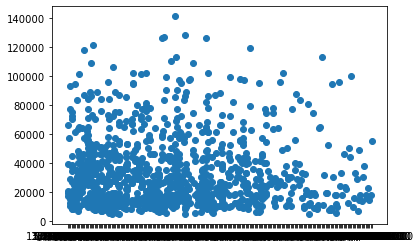

In [7]:
# Check the sale date against sale price
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1100],df['SalePrice'][:1100]);

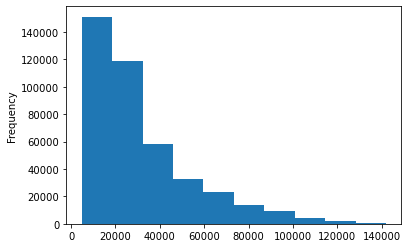

In [8]:
df.SalePrice.plot.hist();

### Parsing dates

This involves the enriching of the time and date component as much as possible.

We attain this by parsing the dates column(s).


In [7]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [9]:
# Import data again and parse dates
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory = False,
                parse_dates = ['saledate'])

In [11]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [13]:
df['saledate'].dtypes

dtype('<M8[ns]')

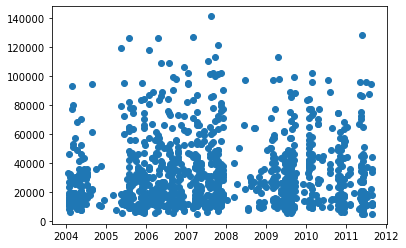

In [14]:
# Check the sale date against sale price after pasrisng the date
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1100],df['SalePrice'][:1100]);

In [17]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### sort dataframe by sale date

Since I'm working with time-series data, I am going to sort it by date

In [18]:
# Sort DataFrame in date order
df.sort_values(by = ['saledate'],inplace=True, ascending=True)


In [56]:
### Make a copy of the original DataFrame 
df_exp = df.copy()

### Add datetime parameter for the saledate column

In [15]:
# ### Just some extra bits
#
# def date_time_func():
#     """
#     Takes date column of the dataframe and extracts month,quarter,year
#     from it
#     """
#     df_exp1['saleYear'] = df_exp1.saledate.dt.year
#     df_exp1['saleMonth'] = df_exp1.saledate.dt.month
#     df_exp1['saleQtr'] = df_exp1.saledate.dt.quarter
#     df_exp1['SaleDayOfWeek'] = df_exp1.saledate.dt.dayofweek
#     df_exp1['SaleDayOfYear'] =  df_exp1.saledate.dt.dayofyear
#
#     return df_exp1
#
# #     time_attributes = ['SaleMonth','SaleYear','SaleQtr']
# #     for index,date in dates.iterrows():
# #         for attrib in time_attributes:
# #             if attrib == 'SaleMonth':
# #                 df_exp1[attrib] = date.dt.month
# #             elif attrib == 'SaleYear':
# #                 df_exp1[attrib] = date.dt.year
# #             elif attrib == 'SaleQtr':
# #                 df_exp1[attrib] = date.dt.quarter
# #             else:
# #                 print('Invalid data')

In [57]:
df_exp['saleYear'] = df_exp.saledate.dt.year
df_exp['saleMonth'] = df_exp.saledate.dt.month
df_exp['saleQtr'] = df_exp.saledate.dt.quarter
df_exp['SaleDayOfWeek'] = df_exp.saledate.dt.dayofweek
df_exp['SaleDayOfYear'] =  df_exp.saledate.dt.dayofyear


In [58]:
# Now that I  have enriched my DataFrame with date time,I can drop saledate
df_exp.drop('saledate',axis=1,inplace=True)

In [59]:
# Checking the sales by state

df_exp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

Now I am going into  model driven EDA

### Dealing with numerical values

I am going to use the pandas category datatype. 

In [62]:
df_exp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [61]:
# Checking string datatypes

df_exp.describe(include=[np.object])

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,73670,412698,412698,271971,58667,74816,196093,412698,412698,412698,...,102916,102261,102332,102261,102193,80712,81875,81877,71564,71522
unique,3,5059,1961,177,123,140,6,74,53,6,...,19,29,3,3,3,2,10,7,4,5
top,Medium,310G,580,C,II,L,Medium,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,TEX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,35832,5348,20179,44431,13770,16464,64342,57542,67320,104230,...,82444,81539,85074,92924,86998,80692,39633,71447,70169,70774


In [63]:
# Checking only the numerical data

df_exp.describe(include=[np.number])

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleQtr,SaleDayOfWeek,SaleDayOfYear
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03,2004.317382,6.300268,2.350433,2.594338,176.784094
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04,5.821090,3.437276,1.141660,1.417971,103.910718
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1989.000000,1.000000,1.000000,0.000000,1.000000
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,2000.000000,3.000000,1.000000,2.000000,82.000000
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006.000000,6.000000,2.000000,3.000000,165.000000
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03,2009.000000,9.000000,3.000000,3.000000,270.000000
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,2012.000000,12.000000,4.000000,6.000000,365.000000


In [64]:
for label,content in df_exp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


#### Turn string datatype to category datatype

In [65]:
# Turning the strings into categories
def string_to_cat():
    for label,content in df_exp.items():
        if pd.api.types.is_string_dtype(content):
            df_exp[label] = content.astype('category').cat.as_ordered()

In [28]:
string_to_cat()

In [55]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 101 entries, SalesID to Steering_Controls_is_missing_
dtypes: bool(44), float64(3), int16(4), int64(10), int8(40)
memory usage: 80.3 MB


In [26]:
# Checking out the categorised data and the associated codes

dict(enumerate(df_exp.state.cat.categories))

{0: 'Alabama',
 1: 'Alaska',
 2: 'Arizona',
 3: 'Arkansas',
 4: 'California',
 5: 'Colorado',
 6: 'Connecticut',
 7: 'Delaware',
 8: 'Florida',
 9: 'Georgia',
 10: 'Hawaii',
 11: 'Idaho',
 12: 'Illinois',
 13: 'Indiana',
 14: 'Iowa',
 15: 'Kansas',
 16: 'Kentucky',
 17: 'Louisiana',
 18: 'Maine',
 19: 'Maryland',
 20: 'Massachusetts',
 21: 'Michigan',
 22: 'Minnesota',
 23: 'Mississippi',
 24: 'Missouri',
 25: 'Montana',
 26: 'Nebraska',
 27: 'Nevada',
 28: 'New Hampshire',
 29: 'New Jersey',
 30: 'New Mexico',
 31: 'New York',
 32: 'North Carolina',
 33: 'North Dakota',
 34: 'Ohio',
 35: 'Oklahoma',
 36: 'Oregon',
 37: 'Pennsylvania',
 38: 'Puerto Rico',
 39: 'Rhode Island',
 40: 'South Carolina',
 41: 'South Dakota',
 42: 'Tennessee',
 43: 'Texas',
 44: 'Unspecified',
 45: 'Utah',
 46: 'Vermont',
 47: 'Virginia',
 48: 'Washington',
 49: 'Washington DC',
 50: 'West Virginia',
 51: 'Wisconsin',
 52: 'Wyoming'}

###  Check missing data ratios

In [54]:
df_exp.isna().sum()/len(df_exp)

SalesID                          0.0
SalePrice                        0.0
MachineID                        0.0
ModelID                          0.0
datasource                       0.0
                                ... 
Backhoe_Mounting_is_missing_     0.0
Blade_Type_is_missing_           0.0
Travel_Controls_is_missing_      0.0
Differential_Type_is_missing_    0.0
Steering_Controls_is_missing_    0.0
Length: 101, dtype: float64

### Save preprocessed data in the current state

> Data checkpoint

In [31]:
df_exp.to_csv('data/train_tmp.csv',index=False)

In [33]:

df_exp


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleQtr,SaleDayOfWeek,SaleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,1,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,1,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,1,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,1,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,1,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,2,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,2,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,2,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,2,5,119


## Fill the missing values

### Fill numeric values first

In [34]:
# List numeric columns
def list_numeric_columns():
    for label,content in df_exp.items():
        if pd.api.types.is_numeric_dtype(content):
            print(label)

In [35]:
# Check the columns with missing values
def check_missing_numeric():
    for label,content in df_exp.items():
        if pd.api.types.is_numeric_dtype(content):
            if content.isna().sum()>0:
                print(label)

In [36]:
# Fill numeric rows with median
def fill_missing_numeric():
    for label,content in df_exp.items():
        if pd.api.types.is_numeric_dtype(content):
            if content.isna().sum()>0:
                # Include a column to show that this was a missing data cell
                df_exp[label+'_is_missing_'] = pd.isnull(content)
                # Fill missing numeric values with median
                df_exp[label] = content.fillna(content.median())

#### Check numeric columns 

In [37]:
list_numeric_columns()

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleQtr
SaleDayOfWeek
SaleDayOfYear


#### Check Missing numeric

In [38]:
check_missing_numeric()

auctioneerID
MachineHoursCurrentMeter


#### Fill Mising numeric

In [35]:
fill_missing_numeric()

In [39]:
# Check to see how many values were filled 
df_exp['auctioneerID_is_missing_'].value_counts()

KeyError: 'auctioneerID_is_missing_'

### Fill in categorical variables

In [49]:
for label,content in df_exp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if content.isna().sum()>0:
            print(label)

In [50]:
# Turn categorical variables into numbers and fill missing data
def fill_in_cat():
    for label,content in df_exp.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Include a column to show that this was a missing data cell
            df_exp[label+'_is_missing_'] = pd.isnull(content)
            # Turn categories into numbers and add 1
            df_exp[label] = pd.Categorical(content).codes+1
            

In [51]:
fill_in_cat()

## Modeling 

The data has been made numerical, the next step is to start working on a model

In [ ]:
# # Building a ML model
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_jobs=-1,
#                              random_state = 42)

# model.fit(df_exp.drop('SalePrice',axis=1),df_exp['SalePrice'])

### Splitting data into training and validation set

In [43]:
df_val = df_exp[df_exp.saleYear==2012]
df_train = df_exp[df_exp.saleYear != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [44]:
# Split data into X and Y
X_train,y_train = df_train.drop('SalePrice',axis=1),df_train['SalePrice']
X_valid,y_valid = df_val.drop('SalePrice',axis=1),df_val['SalePrice']

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 100), (401125,), (11573, 100), (11573,))

### Building an evaluation function

In [45]:
# Create evaluation function for  the RMSLE as requested by Kaggle 

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_true,y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_true,y_preds))

# Creating a function to evaluate model on different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE':mean_absolute_error(y_train,train_preds),
             'Validation MAE':mean_absolute_error(y_valid,val_preds),
             'Training RMSLE':rmsle(y_train,train_preds),
             'Validation RMSLE':rmsle(y_valid,val_preds),
             'Training R^2':r2_score(y_train,train_preds),
             'Validation R^2':r2_score(y_valid,val_preds)}
    return scores

### Testing the model to allow for hyperparameter tuning

In [46]:
# Chnage max_samples
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42, 
                             max_samples = 10000)



In [53]:
%%time
# Checking the training time
model.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [48]:
show_scores(model)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Hyperparameter tuning with RandomizedSearchCV

In [52]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters

rf_grid = {'n_estimators':np.arange(10,100,10),
          'max_depth':[None,5,7,12],
          'min_samples_split':np.arange(2,30,4),
          'min_samples_leaf':np.arange(1,20,2),
          'max_features':[0.5,1,'sqrt','auto'],
          'max_samples':[10000]}

# Instantiate the model

rf_model = RandomizedSearchCV(RandomForestRegressor(n_jobs =-1,
                                                    random_state=42),
                             param_distributions = rf_grid,
                             n_iter = 7,
                             cv = 5,
                             verbose = True)

# Fit the model
rf_model.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\moyom\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\moyom\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moyom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\moyom\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\moyom\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\moyom\anaconda3\lib\site-packages\sklearn\utils\validation.py"

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [50]:
# Check the best params
rf_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [51]:
# Evaluate the RandomizedSearch model
show_scores(rf_model)

{'Training MAE': 6257.99196129531,
 'Validation MAE': 7844.343377119375,
 'Training RMSLE': 0.2828903053856856,
 'Validation RMSLE': 0.31278489944800836,
 'Training R^2': 0.8223993886853431,
 'Validation R^2': 0.791180318747996}

## A note concerning the model.

I have noted that due to the limit of n_iter, I could have reached a better model. 

In [52]:
# Model after 100 iterations

great_model = RandomForestRegressor(n_estimators=39,
                                min_samples_leaf=1,
                                min_samples_split=14,
                                n_jobs=-1,
                                max_samples=None)

# Fit the great model
great_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=14, n_estimators=39, n_jobs=-1)

In [53]:
# Evaluate great model
show_scores(great_model)

{'Training MAE': 2863.6068050095328,
 'Validation MAE': 6130.856445260285,
 'Training RMSLE': 0.14096955474203957,
 'Validation RMSLE': 0.2538715089988474,
 'Training R^2': 0.960605025807021,
 'Validation R^2': 0.872373501998648}

## Make predictions on test data

In [54]:
df_test = pd.read_csv('data/Test.csv',
                     low_memory = False,
                     parse_dates = ['saledate'])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data

In [55]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleQtr'] = df.saledate.dt.quarter
    df['SaleDayOfWeek'] = df.saledate.dt.dayofweek
    df['SaleDayOfYear'] =  df.saledate.dt.dayofyear
    
    df.drop('saledate',axis=1,inplace=True)
    
    #Fill the numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if content.isna().sum()>0:
                # Include a column to show that this was a missing data cell
                df[label+'_is_missing_'] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
                
        # Change categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # Include a column to show that this was a missing data cell
            df[label+'_is_missing_'] = pd.isnull(content)
            # Add +1 to the category code to correct the missing category
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [56]:
preprocess_data(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing_,Stick_Length_is_missing_,Thumb_is_missing_,Pattern_Changer_is_missing_,Grouser_Type_is_missing_,Backhoe_Mounting_is_missing_,Blade_Type_is_missing_,Travel_Controls_is_missing_,Differential_Type_is_missing_,Steering_Controls_is_missing_
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [57]:
# Make predictions on the test dataset

test_preds = great_model.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

In [58]:
# Check out where the column values different columns

set(X_train.columns)- set(df_test.columns)

{'auctioneerID_is_missing_'}

In [59]:
# Include the missing column in df_test
df_test['auctioneerID_is_missing_'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing_,Thumb_is_missing_,Pattern_Changer_is_missing_,Grouser_Type_is_missing_,Backhoe_Mounting_is_missing_,Blade_Type_is_missing_,Travel_Controls_is_missing_,Differential_Type_is_missing_,Steering_Controls_is_missing_,auctioneerID_is_missing_
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


>> NOW THE MODEL CAN MAKE PREDICTIONS

In [60]:
# Make predictions

test_preds = great_model.predict(df_test)

test_preds

array([21831.26260284, 19142.4711788 , 48932.51298435, ...,
       12403.87798655, 17464.37334782, 28568.59128706])

In [61]:
# Format predictions into the format Kaggle is asking for

df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,21831.262603
1,1227844,19142.471179
2,1227847,48932.512984
3,1227848,85982.893032
4,1227863,48669.043645
...,...,...
12452,6643171,59923.540002
12453,6643173,11255.878310
12454,6643184,12403.877987
12455,6643186,17464.373348


In [62]:
# Export predictions
df_preds.to_csv('data/test_predictions.csv')

### Feature Importance
>> In this section I seek to identify which attributes of the data are important when it comes to predicting the target variable i.e. SalePrice

In [67]:
# Find the feature importance of the great_model

great_model.feature_importances_

array([4.82397525e-02, 1.29397957e-02, 3.22518535e-02, 1.89636039e-04,
       3.37283172e-03, 2.70523960e-01, 2.49414816e-03, 8.65263870e-04,
       1.99192871e-02, 8.54297646e-02, 5.26149306e-02, 4.35585476e-03,
       3.51390917e-03, 2.36306583e-01, 4.11248638e-02, 6.77960050e-03,
       1.84055581e-04, 2.24100946e-04, 1.76593256e-03, 8.62664704e-03,
       3.16269902e-04, 2.62430132e-05, 4.16978847e-04, 1.72676759e-04,
       1.56767970e-03, 2.34068649e-05, 2.52043055e-05, 4.19045202e-03,
       5.12305002e-04, 3.69989309e-05, 4.09070043e-03, 2.30664939e-03,
       2.12632128e-03, 4.15711556e-03, 1.65564492e-04, 1.53359880e-03,
       7.89698672e-04, 1.76831908e-02, 9.09772409e-06, 4.33949404e-06,
       1.75614548e-04, 9.04411382e-04, 9.68316505e-04, 5.92983500e-04,
       1.57246100e-04, 3.55725539e-04, 2.50970354e-04, 1.36037795e-03,
       8.37499010e-04, 1.51895277e-04, 2.49536474e-04, 7.74766771e-02,
       1.76446472e-03, 4.27793739e-04, 3.10379666e-03, 1.25898216e-02,
      

In [85]:
# Function for plotting feature importance
def plot_features(columns,importances,n=20):
    """
    This functions plots the model's feature_importances
    """
    df = (pd.DataFrame({'features':columns,
                       'feature_importances':importances}).
              sort_values('feature_importances',ascending=False)
             .reset_index(drop=True))
    # Plot the DataFrame
    fig,ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    

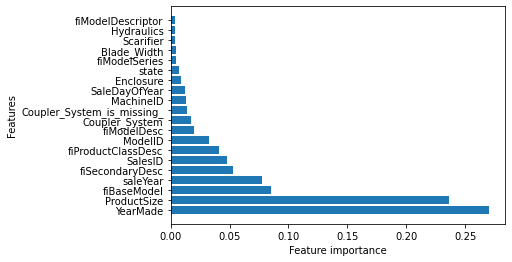

In [86]:
plot_features(X_train.columns,great_model.feature_importances_)